# Problem 1: Null distributions of a one-sample vs two sample t

We've spent a lot of time discussing the "null distribution".
- The null hypothesis for a 1 sample t test is that the mean of the normal population our data comes from is equal to our hypothesized mean, $\mu$. Therefore, the null distribution is the distribution of t values we expect to observe if we randomly sample from a normal population that has a mean equal to our hypothesized mean, $\mu$.
- The null hypothesis for a 2 sample t test can be more nuanced, depending on the assumptions we make about each samples standard deviations. Here, we will consider the independent, equal sample size, equal variance two-sample t test.

## Confirm we can calculate t correctly

Let's start by firsting making sure we can calculate t correctly. For this problem, let's use the heights of players (in centimeters) randomly selected from the LA Lakers and Boston Celtics rosters:

Lakers = [200, 210, 220,225,215];

Heat = [190, 220, 193, 200, 190];

In the space below, calculate the 1 sample t value for the Lakers, assuming their average height is 195 cm, and the two-sample t value for this data. Confirm your answers using ttest_1samp and ttest_ind. Be sure to **note** the technicality discussion on the last slide of Lecture 11.

In [3]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
import random
import statsmodels.api as sm

#randomly sample height of 5 players from two teams
lakers=[200,210,220,225,215]
heat=[190,220,193,200,190]

#1 sample t value for the lakers
mu = 195
t_val = (np.mean(lakers)-mu)/np.std(lakers,ddof=1)*np.sqrt(5)
print("The one sample t-value for the Lakers, assuming an average height of 195, is", t_val,".")

#checking my answer
stats.ttest_1samp(lakers,mu)

#two sample t value
sp = np.sqrt(((np.std(lakers,ddof=1)**2) + (np.std(heat,ddof=1)**2))/2)
t_val2 = (np.mean(lakers)-np.mean(heat))/(sp*np.sqrt(2/5))
print("The two sample t-value for the data is", t_val2)

#checking my answer
stats.ttest_ind(lakers,heat)

The one sample t-value for the Lakers, assuming an average height of 195, is 4.417410272265133 .
The two sample t-value for the data is 2.167939197635687


Ttest_indResult(statistic=2.167939197635687, pvalue=0.06201738353641719)

## Compare t distributions for 1 and 2 sample tests

- In the space below, write the code necessary to create null distributions for single and two-sample t tests when:
    - For the single sample t test, you are collecting 9 samples
    - For the two sample t test, you are collected 5 samples for each group.
- Produce density plots to compare the two distributions.
    - Be sure to select enough samples and to adjust bins sizes as needed so that the density plots are clear and stable (meaning each time you run it, you basically get the same answer).
    - Can use density feature of plt.hist or Seaborn's  sns function.
    - On the figure, clearly indicate the degrees of freedom for the specific t test
    - Unclear figures will not receive credit.


Text(-5, 0.25, 'df = 8')

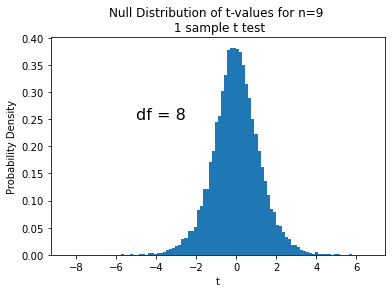

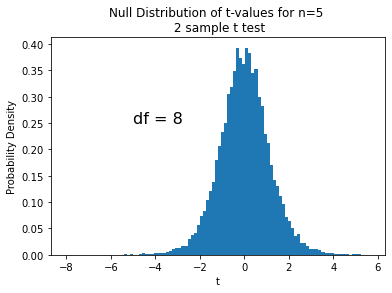

In [4]:
## single sample t test
#generating random data
mu = 200
sigma = 10
norm_data = np.random.normal(mu,sigma,5000)
weighted_averages = np.zeros(20000)

#calculating t values
for m in np.arange(0,20000,1):
    tmp = random.sample(list(norm_data),9) #randomly choosing 9 values from the data
    weighted_averages[m] = (np.mean(tmp)-mu)/np.std(tmp,ddof=1)*np.sqrt(9) #calculating t value, if you don't wanna add ddof in there, have to do sprt of n-1
    
#create a null distribution of t values
plt.subplots()
plt.hist(weighted_averages, density = True, bins = 100)
plt.xlabel("t")
plt.ylabel("Probability Density")
plt.title("Null Distribution of t-values for n=9 \n 1 sample t test")
plt.text(-5,0.25, 'df = 8', fontsize = 16)


## two sample t test
weighted_averages2 = np.zeros(20000)

#calculating t values
for m in np.arange(0,20000,1):
    tmp = random.sample(list(norm_data),5) #randomly choosing 5 values from the data
    tmp2 = random.sample(list(norm_data),5) #randomly choosing 5 values from the data
    sp = np.sqrt(((np.std(tmp,ddof=1)**2) + (np.std(tmp2,ddof=1)**2))/2)
    weighted_averages2[m] = (np.mean(tmp)-np.mean(tmp2))/(sp*np.sqrt(2/5)) #calculating t value, if you don't wanna add ddof in there, have to do sprt of n-1
    
#create a null distribution of t values
plt.subplots()
plt.hist(weighted_averages2, density = True, bins = 100)
plt.xlabel("t")
plt.ylabel("Probability Density")
plt.title("Null Distribution of t-values for n=5 \n 2 sample t test")
plt.text(-5,0.25, 'df = 8', fontsize = 16)

Based on your figure(s) above, how do the two distributions compare? **Comment here:**
<font color=red> The two distributions look almost identical.</font>

## Compute p value for two-sample t test
- Using your null t distribution for your two sample t test, what is the likelihood that the heights of the Lakers and Heat come from populations with the same means?
- Check your answer using ttest_ind

In [5]:
#finding where the t distribution is greater than the calculated t-value
#multiply by 2 bc two sample -> both tails
print(2*(sum(weighted_averages2>=t_val2)/20000))

#checking my answer
stats.ttest_ind(lakers,heat)

0.0616


Ttest_indResult(statistic=2.167939197635687, pvalue=0.06201738353641719)

# Problem 2 Changing our data's distributions

As we've seen, we typically must assume that our data comes from a normal distribution. Let's use our brute force approach to determine how changing that assumption impacts our null t distributions.

- Below, create the null t distributions for a single-sample t test for n = 3, 8 and 30 when sampling from a normal distribution and a uniform distribution. 
- For each case, plot the density plots such that you can compare the distributions that result from sampling the normally and uniformally distributed data.
- Clearly label all figures.

Text(0.5, 1.0, 'Null Distribution of t-values for n=30 \n 1 sample t test')

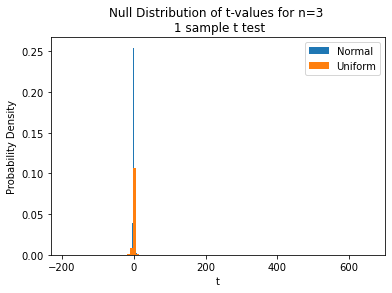

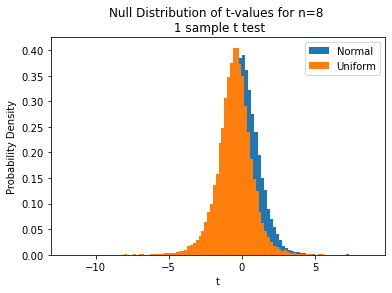

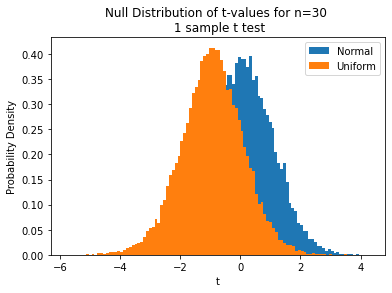

In [6]:
## n = 3
#generating random data
mu = 200
sigma = 10
norm_data = np.random.normal(mu,sigma,5000)
uni_data = np.random.uniform(min(norm_data),max(norm_data),5000)
weighted_averages_norm = np.zeros(20000)
weighted_averages_uni = np.zeros(20000)

#calculating t values
for m in np.arange(0,20000,1):
    tmp = random.sample(list(norm_data),3) #randomly choosing 3 values from the data
    tmp2 = random.sample(list(uni_data),3)
    weighted_averages_norm[m] = (np.mean(tmp)-mu)/np.std(tmp,ddof=1)*np.sqrt(3) #calculating t value, if you don't wanna add ddof in there, have to do sprt of n-1
    weighted_averages_uni[m] = (np.mean(tmp2)-mu)/np.std(tmp2,ddof=1)*np.sqrt(3) #calculating t value, if you don't wanna add ddof in there, have to do sprt of n-1
    
#create a null distribution of t values
plt.subplots()
plt.hist(weighted_averages_norm, density = True, bins = 100,label = 'Normal')
plt.hist(weighted_averages_uni, density = True, bins = 100,label = 'Uniform')
plt.legend()
plt.xlabel("t")
plt.ylabel("Probability Density")
plt.title("Null Distribution of t-values for n=3 \n 1 sample t test")

## n = 8
#calculating t values
for m in np.arange(0,20000,1):
    tmp = random.sample(list(norm_data),8) #randomly choosing 8 values from the data
    tmp2 = random.sample(list(uni_data),8)
    weighted_averages_norm[m] = (np.mean(tmp)-mu)/np.std(tmp,ddof=1)*np.sqrt(8) #calculating t value, if you don't wanna add ddof in there, have to do sprt of n-1
    weighted_averages_uni[m] = (np.mean(tmp2)-mu)/np.std(tmp2,ddof=1)*np.sqrt(8) #calculating t value, if you don't wanna add ddof in there, have to do sprt of n-1
    
#create a null distribution of t values
plt.subplots()
plt.hist(weighted_averages_norm, density = True, bins = 100,label = 'Normal')
plt.hist(weighted_averages_uni, density = True, bins = 100,label = 'Uniform')
plt.legend()
plt.xlabel("t")
plt.ylabel("Probability Density")
plt.title("Null Distribution of t-values for n=8 \n 1 sample t test")

## n = 30
#calculating t values
for m in np.arange(0,20000,1):
    tmp = random.sample(list(norm_data),30) #randomly choosing 30 values from the data
    tmp2 = random.sample(list(uni_data),30)
    weighted_averages_norm[m] = (np.mean(tmp)-mu)/np.std(tmp,ddof=1)*np.sqrt(30) #calculating t value, if you don't wanna add ddof in there, have to do sprt of n-1
    weighted_averages_uni[m] = (np.mean(tmp2)-mu)/np.std(tmp2,ddof=1)*np.sqrt(30) #calculating t value, if you don't wanna add ddof in there, have to do sprt of n-1
    
#create a null distribution of t values
plt.subplots()
plt.hist(weighted_averages_norm, density = True, bins = 100,label = 'Normal')
plt.hist(weighted_averages_uni, density = True, bins = 100,label = 'Uniform')
plt.legend()
plt.xlabel("t")
plt.ylabel("Probability Density")
plt.title("Null Distribution of t-values for n=30 \n 1 sample t test")

**Comment here** on how changing distributions from which our data is collected impacts the null t distribution.

<font color = red>Using a uniform distribution instead, shifts the null distribution away from a center of 0. It also makes the distribution more spread than when using the normal distribution.</font>

# Problem 3 U statistic (i.e. no distribution assumptions)

One major concern is that we often know nothing about the data. We have no good reason to assume it is from a normal distribution. Instead, we have to use nonparametric statistical tools wherein we do not have to make any assumptions on whether our data comes from a specific population. One option is the U statistic from the Wilcoxon rank-sum test.

The assumption here is that two independent samples were selected from populations having the same distribution, but we don't know what that distribution is.

How to calculate U for small data sets (i.e. direct method)
- U is the number of “wins” between two competing datasets
- For each observation in one set, count the number of times this first value wins over any observations in the other set.
- Count 0.5 for any ties
- The sum of wins and ties is the U for that datasets
- To keep our discussion simple, we will ignore the case of ties

Here's a short example:
- Jason and Mr. N are competing. Jason scores a 100, 55, and 50. Mr. N scores a 90, 80, 60.
- Order the data by wins from highest to lowest and indicate who the score belongs to : J N N N J J
- We can calculate the U for Jason (call it U1) by adding the number of wins for each J entry. Namely, the first J beats N 3 times while the second and third J have no wins. So we get U1 = 3 + 0 + 0.
    - We can do the same calculation for Mr. N and get U2 = 2 + 2 + 2 = 6.
- Now, all we need to interpret these numbers is our absolute favorite thing: **a null distribution!!**

The null distribution for a U statistic is simply the score all of the **possible combinations of outcomes**. For example, if we only had two measurements for J and N, the possible combinations are:
   - JJBB (U1 = 4)
   - JBJB (U1 = 3)
   - JBBJ (U1 = 2)
   - BJBJ (U1 = 1)
   - BBJJ (U1 = 0)
   - BJJB (U1 = 2)

A histogram of the U1's above would be our null distribution. 

In the space below, wrote the code to construct the null distribution of U1 for when 5 samples are collected for each group. Hint: look for packages that can identify all combinations of two vectors...


Text(0.5, 0, 'Frequency')

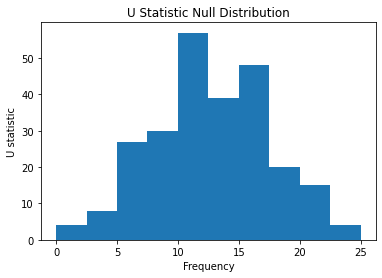

In [63]:
#import necessary packages
import itertools
#from itertools import combinations


#identify unique combinations of two groups
unique_combos = []
actual_combos = []

#create all possible combos of 1s and 2s
unique_combos = np.asarray(list(itertools.product(range(1,3),repeat=10)))

#filter out combos that don't have five of each number
n=0
for combo in unique_combos:
    if np.count_nonzero(combo==1)==5:
        actual_combos.append(combo)
        n=n+1

#calculate u statistic of each combo
u_stat = np.zeros(len(actual_combos))
p_val = np.zeros(len(actual_combos))
n=0

for combo in actual_combos:
    r1 = 0
    for q in range(len(combo)):
        if combo[q]==2:
            r1 = r1 + (10-q)
    u_stat[n] = r1 - (5*6)/2
    n=n+1

#make histogram of it
plt.hist(u_stat, bins=10)
plt.title("U Statistic Null Distribution")
plt.ylabel("U statistic")
plt.xlabel("Frequency")

You collect two samples:

a = (7,1,2,8,10)
b = (4,5,6,9,11)

Use your distribution to estimate the likelihood (two-sided p value) that a and b come from the same distributions.


In [64]:
#two samples
a = [7,1,2,8,10]
b = [4,5,6,9,11]

#calculated R1 by hand
#r1 for a is 30
#r2 for b is 25
u1 = 30 - (5*6)/2
u2 = 25 - (5*6)/2

#p value
print("The two-sided p-value based on the distribution is ", 2*sum(u_stat>u1)/252)

#checking answer with wilcoxon package
stats.wilcoxon(a,b,zero_method='wilcox',alternative='two-sided')

The two-sided p-value based on the distribution is  0.5476190476190477


WilcoxonResult(statistic=3.0, pvalue=0.3125)